# DESAFIO 1

## Paso 1. Abrir el dataset SATscore2015.csv. Investigar la estructura de los datos y responder

### 1. ¿Qué es lo que describen los datos?

Los datos muestran los puntajes promedio de exámenes SAT por Estado en EE.UU. 
Se ofrece puntaje de resultados totales y en las áreas de matemática y escritura. Cada sección otroga entre 200 y 800 puntos, es decir que como resultado total de la evaluación pueden obtenerse entre 600 y 2400 puntos. 
El examen SAT evalúa además 'critical reading', que no está incluido en este dataset.  

### 2. ¿Se ve algún problema en los datos? ¿Están completos?

A simple vista los datos de la columna "Mathematics" están entrecomillados y falta el dato para el estado de Virginia (38). En "Writing" aparece un valor por encima de 800 (38, Pennsylvania, 842). En ambos casos, los valores pordrían ser reemplazados por los datos correspondientes -si están disponibles- o por la media de cada columna.

### 3. ¿Qué representan las filas? ¿Y las columnas?

Las filas representan los estados de EE.UU. y las columas los puntajes.

### 4. Creá un diccionario de datos para el dataset en formato texto. En el mismo deben describirse las diferentes variables, su nivel de medición y dar alguna(s) medida(s) descriptiva(s) de cada una.

Variable 1: estados => nominal 

Variable 2: maths => numérica (discreta)

Variable 3: writing => numérica (discreta) 

Variable 4: total => numérica (discreta)

## Paso 2. Cargar el dataset

### 5. Cargá los datos en una lista de listas

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('SATscore2015.csv')

### 6. Visualizá (print) los datos

In [2]:
print(data)

                   State Mathematics  Writing  Total SAT score
0                Alabama         538      533             1616
1                 Alaska         503      482             1494
2                Arizona         527      502             1552
3               Arkansas         569      551             1688
4             California         506      491             1492
5               Colorado         587      567             1736
6            Connecticut         506      504             1514
7               Delaware         461      445             1368
8   District of Columbia         440      432             1313
9                Florida         480      468             1434
10               Georgia         485      475             1450
11                Hawaii         508      477             1472
12                 Idaho         463      442             1372
13              Illinois         616      587             1802
14               Indiana         499      478          

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
State              53 non-null object
Mathematics        53 non-null object
Writing            53 non-null int64
Total SAT score    53 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


### 7. Extraé una lista de las etiquetas de los datos y removela del dataset

In [4]:
etiquetas = data.columns
etiquetas

Index(['State', 'Mathematics', 'Writing', 'Total SAT score'], dtype='object')

In [5]:
scores = data.iloc[:,1:]
scores[0:5]

,Mathematics,Writing,Total SAT score
0,538,533,1616
1,503,482,1494
2,527,502,1552
3,569,551,1688
4,506,491,1492


### 8. Creá una lista con los nombres de los Estados del dataset. (Pista: usá la lista de etiquetas como índice)

In [6]:
estados = data.iloc[1:,:1]
estados[0:5]

,State
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado


### 9. Imprimí los tipos de cada columna

In [7]:
print(data.columns)
print(type('State'))
print(type('Mathematics'))
print(type('Writing'))
print(type('Total SAT score'))

Index(['State', 'Mathematics', 'Writing', 'Total SAT score'], dtype='object')
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
State              53 non-null object
Mathematics        53 non-null object
Writing            53 non-null int64
Total SAT score    53 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


### 10. ¿Hay algún tipo que deba ser cambiado? Si es así, transformalo al tipo que corresponde

In [9]:
# Reemplazamos el caracter extraño por el resultado 
# (Fuente: https://nces.ed.gov/programs/digest/d15/tables/dt15_226.40.asp?current=yes)
data.iloc[47:48,1:2] = 516

In [10]:
#La columna Mathematics tiene que ser int64
data['Mathematics'] = pd.to_numeric(data['Mathematics'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
State              53 non-null object
Mathematics        53 non-null int64
Writing            53 non-null int64
Total SAT score    53 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [12]:
mat = np.array(data["Mathematics"])
mat

array([538, 503, 527, 569, 506, 587, 506, 461, 440, 480, 485, 508, 463,
       616, 499, 600, 592, 587, 559, 473, 493, 529, 609, 607, 563, 599,
       556, 590, 494, 530, 521, 544, 502, 504, 608, 563, 569, 521, 504,
       450, 494, 487, 597, 574, 486, 575, 524, 516, 388, 510, 497, 605, 586])

In [42]:
data.head()

,State,GDP 2016,% of Nation,Pop. dens.Rank,Density (Pop. / km²),Pop.Rank,2015 population,Immigrant Population,% Inmigrant Pop.,Land Rank,Land area (km²),GINI rank,GINI value,Budget per pupil 2014,Mathematics,Writing,Total SAT score
1,Alaska,50713,0.27,50.0,0.0,48.0,738432.0,54000.0,0.073128,1.0,1477953.4,1.0,0.418,18416,503.0,482.0,1494.0
2,Arizona,302952,1.64,33.0,23.0,14.0,6828065.0,896000.0,0.131223,6.0,294207.1,30.0,0.468,7528,527.0,502.0,1552.0
3,Arkansas,120689,0.65,34.0,22.0,33.0,2978204.0,139000.0,0.046672,27.0,134770.0,34.0,0.471,9616,569.0,551.0,1688.0
4,California,2602672,14.10,11.0,97.0,1.0,39144818.0,10390000.0,0.265425,3.0,423970.7,47.0,0.489,9595,506.0,491.0,1492.0
5,Colorado,323692,1.75,37.0,20.0,22.0,5456574.0,516000.0,0.094565,8.0,268431.5,20.0,0.458,8985,587.0,567.0,1736.0


In [14]:
# Chequeamos que los valores estén dentro del rango SAT
math = data['Mathematics'].astype(int)
print(math >= 200) 
print(math <= 800)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
Name: Mathematics, dtype: bool
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
3

In [15]:
# Calculamos descriptivos de 'Mathematics' 
math.describe()

count     53.000000
mean     531.962264
std       51.895962
min      388.000000
25%      497.000000
50%      524.000000
75%      575.000000
max      616.000000
Name: Mathematics, dtype: float64

In [16]:
# Repetimos los procedimientos anteriores
writing = data['Writing'].astype(int)

In [17]:
print(writing >= 200) 
print(writing <= 800)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
Name: Writing, dtype: bool
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32    

In [18]:
# Descubrimos un valor excedido (38)
writing[38] 

842

In [19]:
# Corregimos el valor (Fuente: https://nces.ed.gov/programs/digest/d15/tables/dt15_226.40.asp?current=yes)
writing[38] = 482

In [20]:
# Calculamos descriptivos de 'Writing' 
writing.describe()

count     53.000000
mean     514.150943
std       48.174920
min      412.000000
25%      478.000000
50%      504.000000
75%      564.000000
max      587.000000
Name: Writing, dtype: float64

In [21]:
total = data['Total SAT score'].astype(int)
print(total >= 600) 
print(total <= 2400)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
Name: Total SAT score, dtype: bool
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    Tr

In [22]:
total.describe()

count      53.000000
mean     1576.188679
std       148.712430
min      1214.000000
25%      1472.000000
50%      1552.000000
75%      1723.000000
max      1802.000000
Name: Total SAT score, dtype: float64

### 11. Creá un diccionario para cada columna vinculando cada Estado con su respectivo valor en esa columna

In [23]:
lista_mat = np.array(data["Mathematics"])

In [24]:
lista_state = np.array(data["State"])

In [25]:
lista_writ = np.array(data["Writing"])

In [26]:
lista_totsco = np.array(data["Total SAT score"])

In [27]:
dic_state_vs_mat = dict(zip(lista_state,lista_mat))

In [28]:
dic_state_vs_writ = dict(zip(lista_state,lista_writ))

In [29]:
dic_state_vs_totsco = dict(zip(lista_state,lista_totsco))

### 12. Creá un diccionario para cada una de las columnas numéricas

## Paso 3. Describir los datos

### 13. Imprimí el máximo y el mínimo de cada columna

In [30]:
# Cómo hago para que me también indique el Estado???
print('Máximo en Matemática:', math.max())
print('Mínimo en Matemática:', math.min())

Máximo en Matemática: 616
Mínimo en Matemática: 388


In [31]:
print('Máximo en Writing:', writing.max())
print('Mínimo en Writing:', writing.min())

Máximo en Writing: 587
Mínimo en Writing: 412


In [32]:
print('Máximo en examen SAT:', total.max())
print('Mínimo en examen SAT:', total.min())

Máximo en examen SAT: 1802
Mínimo en examen SAT: 1214


### 14. Escribí una función que use solo lists comprehensions (no for loops) para calcular el Desvío Estándar. Imprimí el Desvío Estándar de cada columna numérica.

## Paso 4. Visualizar los datos

### 15. Usando MatPlotLib y PyPlot, graficá la distribución del Rate. ¿Qué tipo de gráfico le correspondería? ¿Por qué?

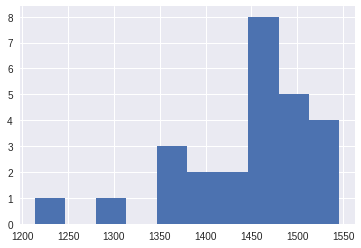

53


In [47]:
plt.hist(total[total < 1550])
plt.show()


print(len(total))

### 16. Graficá la distribución de la variable *Math*

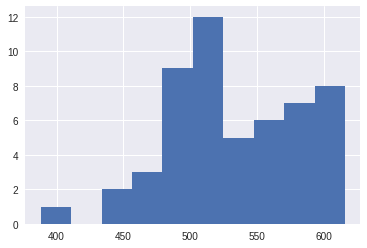

In [34]:
plt.hist(math)
plt.show()

### 17. Graficá la distribución de la variable *Writing*

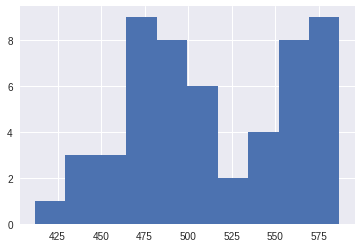

In [35]:
plt.hist(writing)
plt.show()

### 18. ¿Cuál sería un supuesto acerca de la distribución que genera los datos?

In [36]:
data = pd.concat([estados, math, writing, total], axis=1)
data.columns = ["State", "Mathematics", "Writing", "Total SAT score"]

### 19. ¿Qué podrías decir de ese supuesto en relación a los datos analizados?

## BONUS: Complementá el análisis

### 20. Elegí fuentes de datos adicionales (pobreza, ingresos, población, migrantes, etc.). Analiza y grafica los datos de forma conjunta para observar posibles relaciones. 
#### Pista: chequear consignas para ir a los links con datos

In [37]:
data2 = pd.read_excel('complementary_data.xlsx')
data2.head()

,State,GDP 2016,% of Nation,Pop. dens.Rank,Density (Pop. / km²),Pop.Rank,2015 population,Immigrant Population,% Inmigrant Pop.,Land Rank,Land area (km²),GINI rank,GINI value,Budget per pupil 2014
0,Alabama,204861,1.11,27.0,37.0,24.0,4858979.0,167000.0,0.034369,28.0,131169.9,36.0,0.476,9028
1,Alaska,50713,0.27,50.0,0.0,48.0,738432.0,54000.0,0.073128,1.0,1477953.4,1.0,0.418,18416
2,Arizona,302952,1.64,33.0,23.0,14.0,6828065.0,896000.0,0.131223,6.0,294207.1,30.0,0.468,7528
3,Arkansas,120689,0.65,34.0,22.0,33.0,2978204.0,139000.0,0.046672,27.0,134770.0,34.0,0.471,9616
4,California,2602672,14.10,11.0,97.0,1.0,39144818.0,10390000.0,0.265425,3.0,423970.7,47.0,0.489,9595


### 21. A partir de las variables seleccionados, ¿observas una mayor incidencia de alguna de las variables y la performance del estado en alguno de los scores? ¿Consideras importante inferir alguna conclusión para orientar a los directivos de la universidad y/o profundizar el análisis?  

In [38]:
df = pd.concat([data2, math, writing, total], join='outer', axis=1)
df.corr(method='pearson', min_periods=1).head()

,GDP 2016,% of Nation,Pop. dens.Rank,Density (Pop. / km²),Pop.Rank,2015 population,Immigrant Population,% Inmigrant Pop.,Land Rank,Land area (km²),GINI rank,GINI value,Budget per pupil 2014,Mathematics,Writing,Total SAT score
GDP 2016,1.000000,0.999999,-0.448526,0.206709,-0.737818,0.985123,0.955922,0.670473,-0.178186,0.146865,0.509478,0.515855,0.016687,0.033878,0.025156,0.014845
% of Nation,0.999999,1.000000,-0.448603,0.206730,-0.738008,0.985138,0.955848,0.670422,-0.178195,0.146664,0.509478,0.515871,0.016723,0.033724,0.025009,0.014694
Pop. dens.Rank,-0.448526,-0.448603,1.000000,-0.779631,0.600576,-0.450855,-0.358227,-0.505379,-0.701417,0.464141,-0.505142,-0.522617,-0.344186,0.197489,0.200175,0.221809
Density\n(Pop.\n/ km²),0.206709,0.206730,-0.779631,1.000000,-0.261621,0.171312,0.199212,0.537833,0.610594,-0.345173,0.418230,0.423000,0.535241,-0.268898,-0.264146,-0.288668
Pop.Rank,-0.737818,-0.738008,0.600576,-0.261621,1.000000,-0.784977,-0.574705,-0.481824,0.005138,0.095789,-0.558907,-0.563204,0.144045,-0.145748,-0.117814,-0.117506


### 22. Graficá algunos scatterplots. Usá algún gráfico de Seaborn para presentar scatterplots múltiples

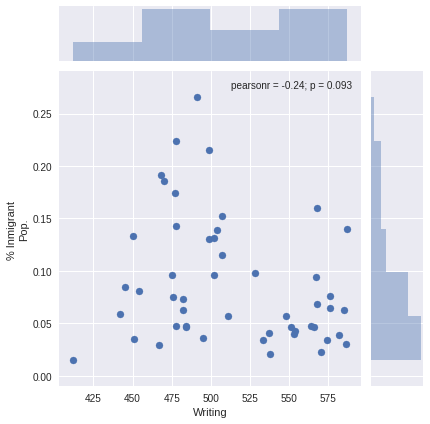

In [39]:
sns.jointplot(writing, data2["% Inmigrant \nPop."])
plt.show()

In [40]:
#Agrego lo de LEAN
data = data2.join(data.set_index("State"), on="State")
data = data.dropna()
data.columns
data.corr(method='pearson', min_periods=1).head()

,GDP 2016,% of Nation,Pop. dens.Rank,Density (Pop. / km²),Pop.Rank,2015 population,Immigrant Population,% Inmigrant Pop.,Land Rank,Land area (km²),GINI rank,GINI value,Budget per pupil 2014,Mathematics,Writing,Total SAT score
GDP 2016,1.000000,0.999999,-0.448396,0.204463,-0.739586,0.985284,0.955813,0.670464,-0.177218,0.145429,0.518633,0.524143,0.035447,-0.201019,-0.226844,-0.235806
% of Nation,0.999999,1.000000,-0.448473,0.204484,-0.739776,0.985299,0.955738,0.670413,-0.177228,0.145228,0.518632,0.524159,0.035433,-0.200974,-0.226825,-0.235769
Pop. dens.Rank,-0.448396,-0.448473,1.000000,-0.780114,0.600929,-0.450660,-0.357997,-0.507821,-0.702076,0.464960,-0.509802,-0.526776,-0.344565,0.366882,0.345592,0.384386
Density\n(Pop.\n/ km²),0.204463,0.204484,-0.780114,1.000000,-0.262899,0.169918,0.196680,0.535921,0.613139,-0.347820,0.427493,0.431419,0.533129,-0.333019,-0.308866,-0.347106
Pop.Rank,-0.739586,-0.739776,0.600929,-0.262899,1.000000,-0.785904,-0.576512,-0.487960,0.005508,0.095352,-0.560656,-0.564596,0.143293,0.079051,0.102159,0.109493


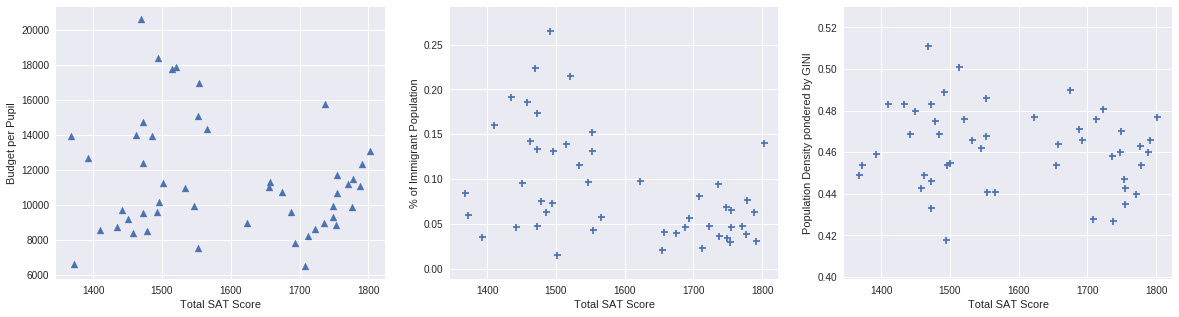

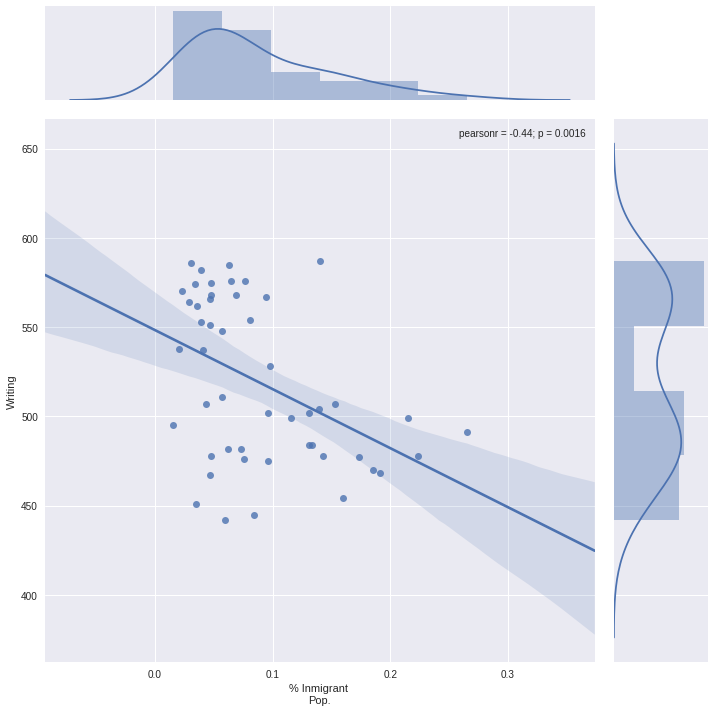

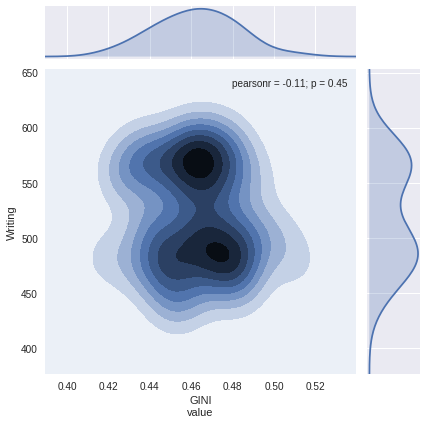

[[ 1.         -0.34710605]
 [-0.34710605  1.        ]]
[[ 1.         -0.44840812]
 [-0.44840812  1.        ]]
[[ 1.         -0.17516155]
 [-0.17516155  1.        ]]


In [41]:
perc_immigrant_pop = data["% Inmigrant \nPop."]
budget_per_pupil = data["Budget per pupil 2014"]
density = data["Density\n(Pop.\n/ km²)"]

plt.figure(figsize=(20,5))

ax1 = plt.subplot(131)
ax1.scatter(data["Total SAT score"], budget_per_pupil , marker='^')
plt.xlabel("Total SAT Score")
plt.ylabel("Budget per Pupil")

ax2 = plt.subplot(132)
ax2.scatter(data["Total SAT score"], perc_immigrant_pop, marker='+')
plt.xlabel("Total SAT Score")
plt.ylabel("% of Immigrant Population")

ax2 = plt.subplot(133)
ax2.scatter( data["Total SAT score"], data["GINI\nvalue"], marker='+')
plt.xlabel("Total SAT Score")
plt.ylabel("Population Density pondered by GINI")

plt.show()


sns.jointplot(perc_immigrant_pop, data["Writing"], kind='reg',size=10)
plt.show()

sns.jointplot(data["GINI\nvalue"], data["Writing"], kind='kde')
plt.show()

print(np.corrcoef(data["Total SAT score"], density))
print(np.corrcoef(data["Total SAT score"], perc_immigrant_pop))
print(np.corrcoef(data["Total SAT score"], budget_per_pupil))

### 23. ¿Hay alguna relación interesante para mencionar? ¿Cuál? ¿Qué tipo de relación es?

Se puede ver un agrupamiento de datos, marcado por la mayor presencia de inmigrantes en las poblaciones con bajo puntaje en ciudades densas de alto riesgo.

### 24. Creá boxplots para cada variable (según corresponda)